In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("real_time_sensor_data.csv", names=["engine_temp", "battery_voltage", "fuel_pressure", "oil_temp", "engine_load"])

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Dataset Shape: (3360, 5)
Columns: Index(['engine_temp', 'battery_voltage', 'fuel_pressure', 'oil_temp',
       'engine_load'],
      dtype='object')


,engine_temp,battery_voltage,fuel_pressure,oil_temp,engine_load
0,113.58,12.05,38.38,115.27,67.57
1,101.47,12.26,47.59,104.84,57.23
2,78.58,12.72,33.74,131.49,58.41
3,86.87,14.12,32.86,102.95,22.56
4,86.03,12.44,47.13,118.65,26.16


In [15]:
print("Missing values per column:\n", df.isnull().sum()) #check missing values

Missing values per column:
 engine_temp        0
battery_voltage    0
fuel_pressure      0
oil_temp           0
engine_load        0
dtype: int64


In [17]:
print("Duplicate Rows:", df.duplicated().sum()) #check duplicate data

Duplicate Rows: 0


In [19]:
df.drop_duplicates(inplace=True)

In [21]:
df.describe()

,engine_temp,battery_voltage,fuel_pressure,oil_temp,engine_load
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000
mean,94.931628,13.505637,44.968997,115.023054,50.128238
std,14.244330,0.872844,8.713755,20.238409,17.161191
min,68.430000,11.930000,29.390000,77.170000,16.080000
25%,82.540000,12.740000,37.507500,97.622500,35.597500
50%,95.370000,13.520000,45.050000,114.880000,49.710000
75%,107.015000,14.262500,52.422500,132.767500,64.952500
max,121.160000,15.070000,60.770000,151.860000,83.890000


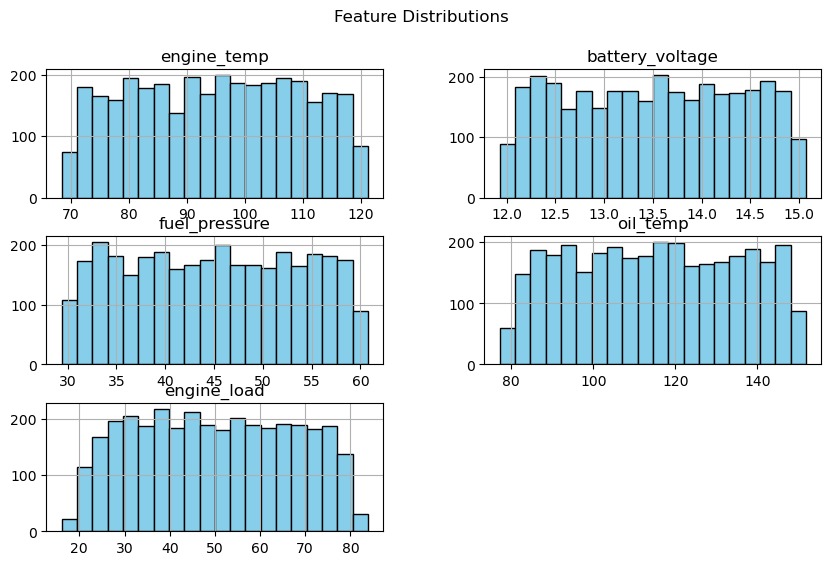

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')  #for check data distributions
plt.suptitle("Feature Distributions")
plt.show()


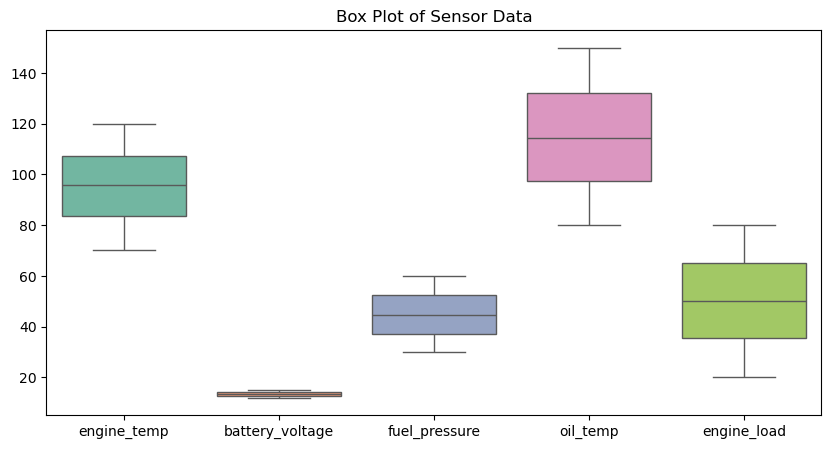

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, palette="Set2") #detect extreme sensor values that may indicate failures.
plt.title("Box Plot of Sensor Data")
plt.show()


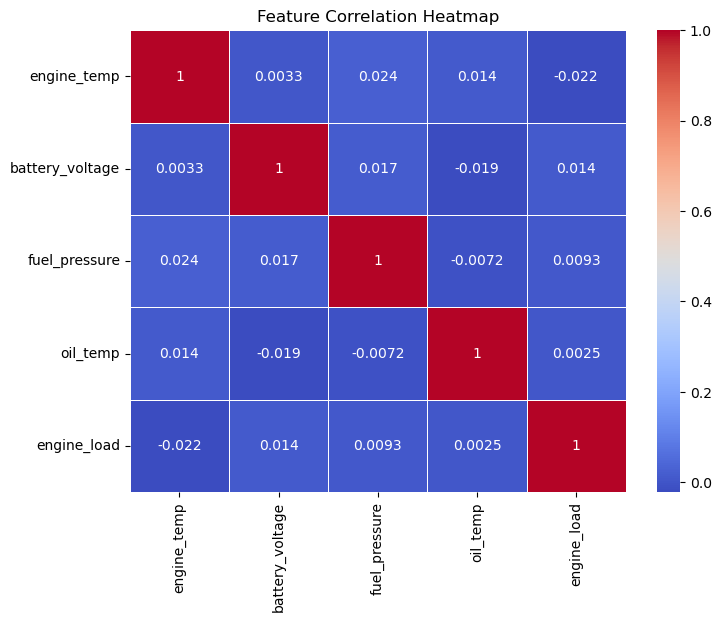

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


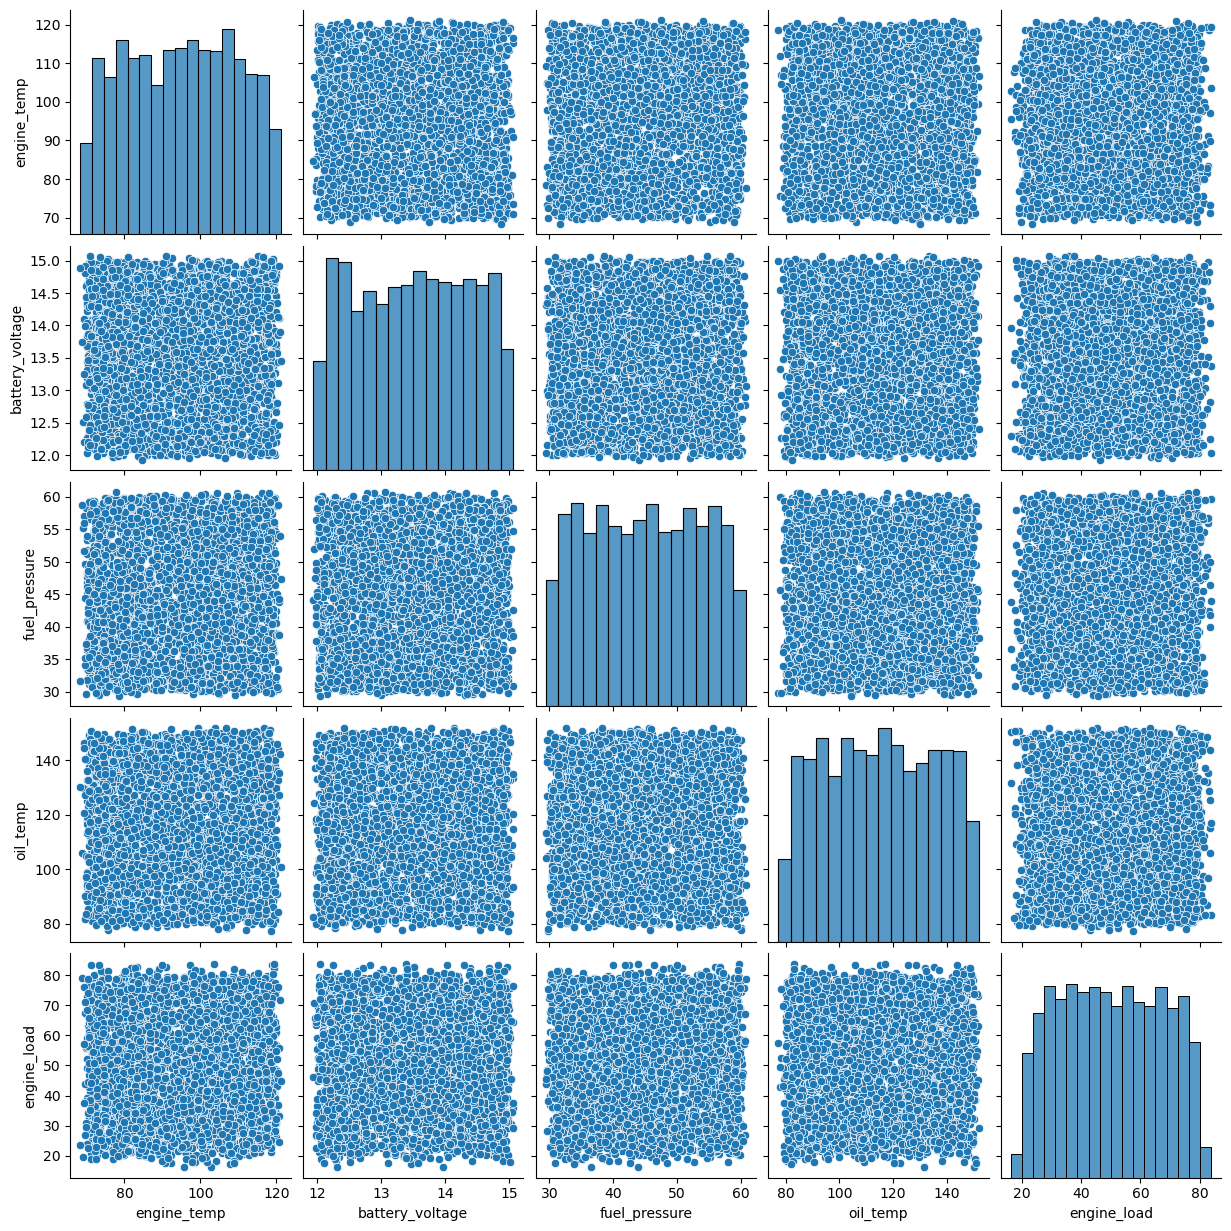

In [25]:
sns.pairplot(df) #visualisation of corelation
plt.show()


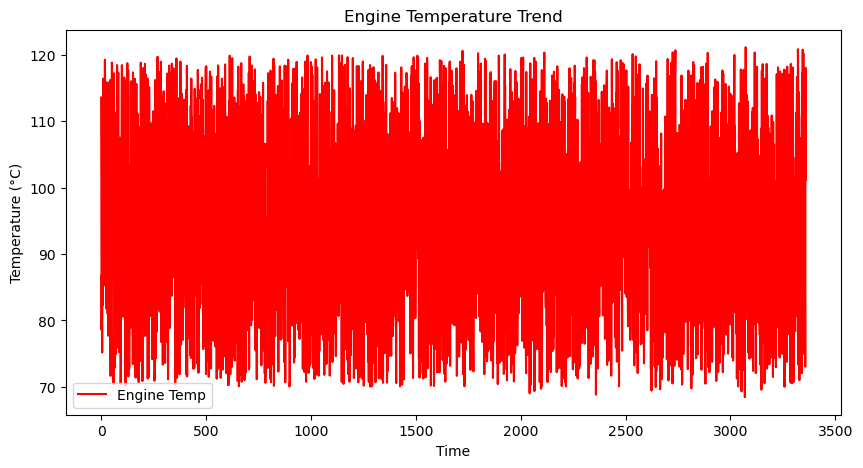

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["engine_temp"], label="Engine Temp", color="red") #check trends over time
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Engine Temperature Trend")
plt.legend()
plt.show()


In [29]:
from scipy.stats import zscore

df["z_score_engine_temp"] = zscore(df["engine_temp"])
df["z_score_battery_voltage"] = zscore(df["battery_voltage"])

# Find extreme values (z-score > 3)
anomalies = df[(df["z_score_engine_temp"].abs() > 3) | (df["z_score_battery_voltage"].abs() > 3)]
print("Detected Anomalies:\n", anomalies)


Detected Anomalies:
 Empty DataFrame
Columns: [engine_temp, battery_voltage, fuel_pressure, oil_temp, engine_load, z_score_engine_temp, z_score_battery_voltage]
Index: []
